In [65]:
from zipfile import ZipFile
import xml.etree.ElementTree as ET
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('danish')
regex = re.compile('[^a-zA-Z]')
%matplotlib inline

In [2]:
def clean(dat):
    data_ym = []
    words = dat.rstrip().split()
    for w in words:
        wc = regex.sub('',w)
        if len(wc)>1:
            if wc not in stop:
                data_ym.append(wc)
    return data_ym

In [3]:
a = ZipFile("./be58ea91532d0ed876f69f2a42254368.1")

In [4]:
filenames = a.infolist()

In [102]:
print(len(filenames))

1196175


In [15]:
good = 0 
bad = 0

def parse(filename):
    global bad, good 
    file = a.read(filename)
    tree = ET.fromstring(file)
    year = 0
    txt = ""
    try:
        year = tree.getchildren()[0].getchildren()[0].getchildren()[-1].getchildren()[0].getchildren()[0].text[:4]
        txt = tree.getchildren()[0].getchildren()[0].getchildren()[1].text
        good += 1 
        return (year, clean(txt))
    except:
        bad += 1
        return (year, clean(txt))
    

In [19]:
res = {}
files =0 
for f in filenames[1:]:
    files += 1
    if files % 4000 == 0:
        print(files, good ,bad )
    year, words = parse(f.filename)
    if year is not 0:
        gl = res.get(year)
        if gl is None:
            gl = []
        for word in words:
            gl.append(word)
        res[year] = gl

100 1198227 6124
200 1198327 6124
300 1198426 6125
400 1198525 6126
500 1198622 6129
600 1198721 6130
700 1198820 6131
800 1198920 6131
900 1199019 6132
1000 1199119 6132
1100 1199216 6135
1200 1199316 6135
1300 1199409 6142
1400 1199509 6142
1500 1199607 6144
1600 1199705 6146
1700 1199805 6146
1800 1199903 6148
1900 1200003 6148
2000 1200102 6149
2100 1200200 6151
2200 1200299 6152
2300 1200398 6153
2400 1200498 6153
2500 1200595 6156
2600 1200695 6156
2700 1200785 6166
2800 1200885 6166
2900 1200984 6167
3000 1201082 6169
3100 1201182 6169
3200 1201280 6171
3300 1201374 6177
3400 1201473 6178
3500 1201572 6179
3600 1201672 6179
3700 1201772 6179
3800 1201871 6180
3900 1201970 6181
4000 1202070 6181
4100 1202169 6182
4200 1202268 6183
4300 1202368 6183
4400 1202468 6183
4500 1202568 6183
4600 1202664 6187
4700 1202763 6188
4800 1202862 6189
4900 1202962 6189
5000 1203062 6189
5100 1203161 6190
5200 1203261 6190
5300 1203361 6190
5400 1203461 6190
5500 1203561 6190
5600 1203661 6190
5

In [101]:
len([item.lower() for sublist in res["1995"] for item in sublist] )

17201

In [88]:
counts = {}
for year in res:
    asd = [item.lower() for sublist in res[year] for item in sublist]
    d = Counter(asd).most_common()
    counts[year] = d

In [90]:
def get_word(counts, word):
    res = {}
    for y in counts:
        if int(y) > 100 and int(y) < 2015:
            dt = counts[y]
            for item in dt:
                if item[0] == word:
                    res[int(y)] = int(item[1])
    df = pd.DataFrame.from_dict(res, orient="index")
        df.sort().plot()

In [91]:
import pandas as pd 

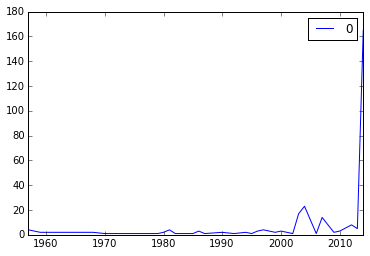

In [111]:
get_word(counts, "elektronisk")